In [1]:
%matplotlib inline

In [2]:
import rasterio as rio
import rasterio.plot
import rasterio.mask
import geopandas as gpds
import fiona
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pds
from osgeo import gdal
import rasterio

In [3]:
# First we have to change the nodata values of the raster, from -3.4028235e+38 to np.nan
# dem_path = '../data/dem/IslandsDEMv1.0_20x20m_isn93_zmasl_nodata_nans.tiff'

# # We update the file in-place:
# with rasterio.open(dem_path, "r+") as dataset:
#     dataset.nodata = np.nan

In [3]:
# Now we read the 20x20 DEM (in ISN93 projection) (with nodata values as np.nan)
dem_path = '../data/dem/IslandsDEMv1.0_20x20m_isn93_zmasl_nodata_nans.tif'
src = rio.open(dem_path)

# We calculate slope for the DEM
slope_fn = '../data/dem/IslandsDEMv1.0_20x20m_isn93_zmasl_nodata_nans_slope.tif'
# if not os.path.exists(slope_fn):
#     !gdaldem slope $dem_path $slope_fn -alg Horn -p # We use the Horn (1981) method, unit is in percent

# First we have to change the nodata values of the raster, from -9999 to np.nan
# We update the file in-place:
# with rasterio.open(slope_fn, "r+") as dataset:
#     dataset.nodata = np.nan

In [4]:
aspect_fn = '../data/dem/IslandsDEMv1.0_20x20m_isn93_zmasl_nodata_nans_aspect.tif'
dem_path = '../data/dem/IslandsDEMv1.0_20x20m_isn93_zmasl_nodata_nans.tif'

if not os.path.exists(aspect_fn):
    !gdaldem aspect $dem_path $aspect_fn

0...10...20...30...40...50...60...70...80...90...100 - done.


In [5]:
# First we have to change the nodata values of the raster, from -9999 to np.nan
# We update the file in-place:
with rasterio.open(aspect_fn, "r+") as dataset:
    dataset.nodata = np.nan

In [6]:
# Now we change all the negative values to 0.
# Open the raster for reading and writing
with rasterio.open(aspect_fn, 'r+') as raster:

    # Read the data into a numpy array
    data = raster.read(1)

    # Replace negative values with np.nan
    data[data < 0] = np.nan

    # Write the modified data back to the raster
    raster.write_band(1, data)

In [104]:
# Another method to calculate the aspect:
# (thanks to https://stackoverflow.com/questions/47653271/calculating-aspect-slope-in-python3-x-matlab-gradientm-function)
# aspect_fn = '../data/dem/IslandsDEMv1.0_20x20m_isn93_zmasl_nodata_nans_aspect.tif'

# def calculate_aspect(DEM):
#     gdal.DEMProcessing(aspect_fn, DEM, 'aspect')
#     with rasterio.open(aspect_fn) as dataset:
#         aspect=dataset.read(1)
#     return aspect

# aspect=calculate_aspect('../data/dem/IslandsDEMv1.0_20x20m_isn93_zmasl_nodata_nans.tif')

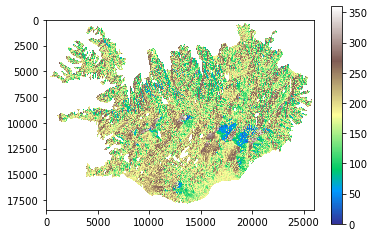

In [13]:
# Now we read the slope and aspect rasters and visualize, to see if it turned out all right:
slope = rio.open(slope_fn)
aspect = rio.open(aspect_fn)
assie = aspect.read(1)

# Display the raster
plt.imshow(assie, cmap='terrain')
plt.colorbar()
plt.show()

In [21]:
# Read the combined watershed file
combined_wsheds_path = '/data/helgason/lamah-ice/gauge_shapefiles/watersheds/final_watersheds_combined_feb9/compiled.shp'
wsheds = gpds.read_file(combined_wsheds_path)
wsheds = wsheds.set_index('id')

In [27]:
elev_mean_dict = dict()
elev_range_dict = dict()
elev_median_dict = dict()
slope_mean_dict = dict()
elev_std_dict = dict()
aspect_mean_dict = dict()
for idx in wsheds.index:
    # Clip raster with the watershed shapefile
    out_image, out_transform = rasterio.mask.mask(src, wsheds.loc[idx], crop=True)
    out_meta = src.meta
    
    # Clip slope raster with the watershed shapefile
    out_slope, out_slope_transform = rasterio.mask.mask(slope, wsheds.loc[idx], crop=True)
    out_slope_meta = slope.meta
    
    # Clip the aspect raster with the watershed shapefile
    out_aspect, out_aspect_transform = rasterio.mask.mask(aspect, wsheds.loc[idx], crop=True)
    out_aspect_meta = aspect.meta
    
    # Calculate attributes for the clipped rasters
    elev_mean = np.nanmean(out_image[0])
    elev_median = np.nanmedian(out_image[0]) 
    elev_range = np.nanmax(out_image[0]) - np.nanmin(out_image[0])
    slope_mean = 10*np.nanmean(out_slope[0])
    elev_std = np.nanstd(out_image[0])
    aspect_mean = np.nanmean(out_aspect[0])
    
    elev_mean_dict[idx] = elev_mean
    elev_range_dict[idx] = elev_range
    elev_median_dict[idx] = elev_median
    slope_mean_dict[idx] = slope_mean
    elev_std_dict[idx] = elev_std
    aspect_mean_dict[idx] = aspect_mean
    
    print('idx %s done' % idx)
#     print('%s, %s' % (idx,wsheds.loc[idx].geometry.area/1000000))

idx 1 done
idx 10 done
idx 100 done
idx 101 done
idx 1010 done
idx 102 done
idx 103 done
idx 104 done
idx 1040 done
idx 10400 done
idx 105 done
idx 106 done
idx 107 done
idx 108 done
idx 11 done
idx 12 done
idx 13 done
idx 14 done
idx 15 done
idx 16 done
idx 17 done
idx 18 done
idx 19 done
idx 2 done
idx 20 done
idx 21 done
idx 22 done
idx 23 done
idx 24 done
idx 25 done
idx 26 done
idx 27 done
idx 28 done
idx 29 done
idx 3 done
idx 30 done
idx 31 done
idx 32 done
idx 33 done
idx 34 done
idx 35 done
idx 36 done
idx 37 done
idx 38 done
idx 39 done
idx 4 done
idx 40 done
idx 41 done
idx 42 done
idx 43 done
idx 44 done
idx 45 done
idx 46 done
idx 47 done
idx 48 done
idx 49 done
idx 5 done
idx 50 done
idx 51 done
idx 52 done
idx 53 done
idx 54 done
idx 55 done
idx 56 done
idx 57 done
idx 58 done
idx 59 done
idx 6 done
idx 60 done
idx 61 done
idx 62 done
idx 63 done
idx 64 done
idx 65 done
idx 66 done
idx 67 done
idx 68 done
idx 69 done
idx 7 done
idx 70 done
idx 71 done
idx 72 done
idx 73 

In [29]:
elev_mean_df = pds.DataFrame.from_dict(elev_mean_dict,orient='index',columns=['elev_mean']).sort_index() #,index=elev_mean_dict.keys())
elev_median_df = pds.DataFrame.from_dict(elev_median_dict,orient='index',columns=['elev_med']).sort_index() #,index=elev_mean_dict.keys())
elev_range_df = pds.DataFrame.from_dict(elev_range_dict,orient='index',columns=['elev_ran']).sort_index() #,index=elev_mean_dict.keys())
slope_mean_df = pds.DataFrame.from_dict(slope_mean_dict,orient='index',columns=['slope_mean']).sort_index() #,index=elev_mean_dict.keys())
elev_std_df = pds.DataFrame.from_dict(elev_std_dict,orient='index',columns=['elev_std']).sort_index() #,index=elev_mean_dict.keys())
aspect_mean_df = pds.DataFrame.from_dict(aspect_mean_dict,orient='index',columns=['asp_mean']).sort_index() #,index=elev_mean_dict.keys())

In [30]:
df_combined = elev_mean_df.join([elev_median_df,elev_range_df,slope_mean_df,elev_std_df,aspect_mean_df])
df_combined.index.name = 'ID'

In [32]:
path_to_save = '/data/helgason/lamah-ice/data/topo_attrs/topo_attrs_feb9_remake_on_march31.csv'
df_combined.round(3).to_csv(path_to_save,sep=';')

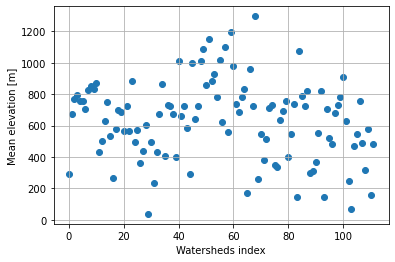

In [83]:
plt.scatter(np.arange(len(df)),df.values)
plt.xlabel('Watersheds index')
plt.ylabel('Mean elevation [m]')
plt.grid()

In [33]:
# Conversion from percent slope to m/km explained:
# Percent slope: 100*(m/m)
# So Percent_slope/100 = m/m
# To convert from m/m we multiply the m/m value by 1000
# So the conversion between percent to m/km becomes:
# (percent_slope/100)*1000 = percent_slope*10

# Calculate glacier topo attrs:

In [36]:
# We read the shapefile containing the glacier area or areas in each catchment
glaciers_path = '/data/helgason/lamah-ice/gauge_shapefiles/glaciers_in_watersheds/glaciers_in_catchments.shp'
glaciers = gpds.read_file(glaciers_path)
glaciers = glaciers.set_index('id')

# First we calculate the lat and lon of the glacier centroid
glaciers['centroid'] = glaciers.centroid
glaciers['g_lon'] = glaciers['centroid'].x
glaciers['g_lat'] = glaciers['centroid'].y

In [66]:
def calculate_slope_lower_20(out_image, out_slope):
    """
    Calculate the slope of the lowermost 20% area of the input DEM.
    
    Parameters:
    -----------
    out_image : numpy.ndarray
        Clipped DEM as a NumPy array.
    out_slope : numpy.ndarray
        Clipped slope raster as a NumPy array.
    
    Returns:
    --------
    slope_lower_20 : float
        The slope of the lowermost 20% area of the input DEM.
    """
    # Calculate the elevation range of the input DEM
    elev_range = np.nanmax(out_image) - np.nanmin(out_image)

    # Threshold elevation values to select lowermost 20% of the input DEM
    threshold = np.nanmin(out_image) + (elev_range * 0.2)
    lower_20_dem = np.where(out_image <= threshold, out_image, np.nan)

    # Mask slope raster with the lowermost 20% of the DEM
    lower_20_slope = np.where(np.isnan(lower_20_dem), np.nan, out_slope)

    # Calculate mean slope of the lowermost 20% area
    slope_lower_20 = 10 * np.nanmean(lower_20_slope)
    
    return slope_lower_20

# Create empty lists to store the calculated values
elev_mean_list = []
elev_min_list = []
elev_max_list = []
aspect_list = []
slope_mean_list = []

# Create an empty pandas dataframe to store the results
glacier_stats = pds.DataFrame(index=glaciers.index, columns=['g_mean_el', 'g_min_el', 'g_max_el', 'g_aspect', 'g_slope', 'g_slopel20'])

# Loop over each glacier polygon
for idx in glaciers.index:
    # Clip elevation raster with the glacier polygon
    out_image, out_transform = rasterio.mask.mask(src, [glaciers.loc[idx]['geometry']], crop=True)
    out_meta = src.meta
    
    # Clip slope raster with the glacier polygon
    out_slope, out_slope_transform = rasterio.mask.mask(slope, [glaciers.loc[idx]['geometry']], crop=True)
    out_slope_meta = slope.meta
    
    # Clip aspect raster with the glacier polygon
    out_aspect, out_aspect_transform = rasterio.mask.mask(aspect, [glaciers.loc[idx]['geometry']], crop=True)
    out_aspect_meta = aspect.meta
    
    # Calculate attributes for the clipped rasters
    elev_mean = np.nanmean(out_image[0])
    elev_min = np.nanmin(out_image[0])
    elev_max = np.nanmax(out_image[0])
    aspect_mean = np.nanmean(out_aspect[0])
    slope_mean = 10*np.nanmean(out_slope[0])
    slope_lower_20 = calculate_slope_lower_20(out_image[0], out_slope[0])#, out_transform)

    # Store results in the pandas dataframe
    glacier_stats.loc[idx, 'g_mean_el'] = elev_mean
    glacier_stats.loc[idx, 'g_min_el'] = elev_min
    glacier_stats.loc[idx, 'g_max_el'] = elev_max
    glacier_stats.loc[idx, 'g_aspect'] = aspect_mean
    glacier_stats.loc[idx, 'g_slope'] = slope_mean
    glacier_stats.loc[idx, 'g_slopel20'] = slope_lower_20


In [67]:
# Combine the two topographical attributes dataframes
df_combined.index.name = 'id'
merged_df = df_combined.merge(glacier_stats, how='outer',left_index=True, right_index=True)
path_to_save = '/data/helgason/lamah-ice/data/topo_attrs/topo_attrs_march31.csv'
merged_df.round(3).to_csv(path_to_save,sep=';')

# To calculate shelter of wind, I need to obtain wind speed and direction from era5-land


In [ ]:
# This code will perform the calculations once wind speed and direction are ready:
# import numpy as np

# # Assume you have wind direction and speed data as `wind_dir` and `wind_speed`
# # `glaciers` is the geodataframe containing glacier polygons

# # Convert wind direction to radians
# wind_rad = np.radians(wind_dir)

# # Calculate the wind vector components
# wind_x = -wind_speed * np.sin(wind_rad)
# wind_y = -wind_speed * np.cos(wind_rad)

# # Calculate the unit normal vector of each glacier
# normals = glaciers.geometry.apply(lambda x: x.centroid - x.representative_point())
# normals /= np.linalg.norm(normals, axis=1)[:, np.newaxis]

# # Calculate the dot product of the wind vector and the unit normal vector
# dot_prod = wind_x[:, np.newaxis] * normals[:, 0] + wind_y[:, np.newaxis] * normals[:, 1]

# # Calculate the shelter from wind (Sx)
# Sx = np.clip(dot_prod, 0, np.inf)